In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mso
import warnings
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import random
# import pycaret
# from pycaret.classification import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
import lightgbm as lgb
gt_x, gt_y = pd.read_csv('./data/gt_x.csv'), pd.read_csv('./data/gt_y.csv')
total_data = pd.read_csv('./data/corpus.csv')

/Users/yueqin/opt/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1,14,18,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:

cat_cols  = ['app','subdomain','domain','suffix','API_method','API_class','company']#,,'API_class','API_method','caller_method']#,'caller_class']#,'caller_class']#,'caller_method']#,]#,'company']
num_cols = ['QB_len','SB_len','API_freq']#'edit_distance']#,'API_freq']
bow_cols = ['path','url_arg_keys','QH_keys','QB_keys','SH_keys','SB_keys']
dom_col = 'domain_category'

cols = cat_cols + bow_cols + num_cols + [dom_col]
bow_feat = total_data[bow_cols].fillna('')
dom_feat = total_data[dom_col].fillna('')
def make_corpus(data):
    if len(data.shape)==1:
        return [x for x in data]
    else:
        corpus = []
        for i, feat in enumerate(data.iterrows()):
            feats =[x for x in data.iloc[i]]
            feats = ','.join(feats)
            corpus.append(feats)
        return corpus

def fit_vectorizor(bow_feat,dom_feat):
    beat_vec = CountVectorizer(tokenizer = lambda x: re.split('/|-|,|',x),stop_words='english',min_df = 0.001,max_df=0.9)
    transformer = TfidfTransformer()
    corpus = []
    for i, feat in enumerate(bow_feat.iterrows()):
        feats =[x for x in bow_feat.iloc[i]]
        feats = ','.join(feats)
        corpus.append(feats)
    # print(corpus)
    transformer.fit(beat_vec.fit_transform(corpus))
    dom_vec = CountVectorizer(tokenizer = lambda x: re.split(' |,',x))
    dom_corpus = [x for x in dom_feat]
    dom_vec.fit(dom_corpus)
    return beat_vec, transformer, dom_vec

beat_vec, transformer, dom_vec = fit_vectorizor(bow_feat,dom_feat)

/Users/yueqin/opt/anaconda3/envs/py36/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)
/Users/yueqin/opt/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


purpose                             
Analytics                               1212
App Functionality                        532
Third-Party Advertising                  247
Developer's Advertising or Marketing     191
Product Personalization                  113
dtype: int64


/Users/yueqin/opt/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Test - LightGBM
Accuracy: 0.9599303135888502
Micro F1: 0.9599303135888502
Macro F1: 0.9489969238671556
Weighted F1: 0.9595621125397461
                                      precision    recall  f1-score   support

                           Analytics       0.96      0.98      0.97       303
                   App Functionality       0.96      0.93      0.95       133
Developer's Advertising or Marketing       0.93      0.85      0.89        48
             Product Personalization       0.93      1.00      0.97        28
             Third-Party Advertising       0.97      0.97      0.97        62

                            accuracy                           0.96       574
                           macro avg       0.95      0.95      0.95       574
                        weighted avg       0.96      0.96      0.96       574

(766, 66)


/Users/yueqin/opt/anaconda3/envs/py36/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)
/Users/yueqin/opt/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Feature Dimension: Categorical:(766, 7), Numerical:(766, 3), BOW:(766, 6),BOW Encoded:(766, 3690), Domain:(766,),Domain Encoded:(766, 377)
Domain Category BOW Features: 377
Application - LightGBM
(766,) (766, 66)
(766, 68)
Accuracy: 0.9621409921671018
Micro F1: 0.9621409921671018
Macro F1: 0.9398673214595477
Weighted F1: 0.961265580231698
                                      precision    recall  f1-score   support

                           Analytics       0.96      1.00      0.98       405
                   App Functionality       0.97      0.97      0.97       178
Developer's Advertising or Marketing       0.94      0.79      0.86        63
             Product Personalization       0.95      0.95      0.95        37
             Third-Party Advertising       0.97      0.92      0.94        83

                            accuracy                           0.96       766
                           macro avg       0.96      0.92      0.94       766
                        weighted 

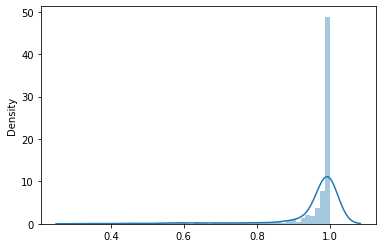

In [14]:

def metrix(y_true, y_pred):
    print('Accuracy:',accuracy_score(y_true, y_pred))
    print('Micro F1:',f1_score(y_true, y_pred, average='micro'))
    print('Macro F1:',f1_score(y_true, y_pred, average='macro'))
    print('Weighted F1:',f1_score(y_true, y_pred, average='weighted'))

    # print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

def train_model(data,label):
    # print(data.iloc[:3],label.iloc[:3])
    ignore_cols = [x for x in data.columns if x not in cat_cols and x not in bow_cols and x not in num_cols]
    cat_feat = data[cat_cols].astype(str)
    # print(cat_feat)
    cat_feat = cat_feat.apply(LabelEncoder().fit_transform)
    num_feat = data[num_cols].astype(float)
    dcn = pd.concat([cat_feat,num_feat ], axis=1)
    dcn = dcn.fillna(0)
    # label = data['purpose']
    bow_feat = data[bow_cols].fillna('')
    corpus = []
    for i, feat in enumerate(bow_feat.iterrows()):
        feats =[x for x in bow_feat.iloc[i]]
        feats = ','.join(feats)
        corpus.append(feats)
    bow_feat_encoded = transformer.transform(beat_vec.transform(corpus)).toarray()
    # print("Aggregated BOW Features:",len(vectorizer.vocabulary_.keys()))
    dom_feat = data[dom_col]
    dom_feat = dom_feat.fillna('')
    dom_corpus = [x for x in dom_feat]

    dom_feat_encoded = dom_vec.transform(dom_corpus).toarray()
    # print("Domain Category BOW Features:",len(dom_vec.vocabulary_.keys()))
    # print(dcn.shape,bow_feat_encoded.shape, dom_feat_encoded.shape)
    # full_feat = np.concatenate([np.array(dcn),dom_feat_encoded], axis=1)

    full_feat = np.concatenate([np.array(dcn), bow_feat_encoded,dom_feat_encoded], axis=1)
    X,y = full_feat, label
    y = y.replace('Developer Advertising or Marketing',"Developer's Advertising or Marketing")
    print(y.value_counts())
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, shuffle=1, random_state=8)
    #
    # lrclf = LogisticRegression(solver='liblinear')
    # lrclf.fit(X_train, y_train)
    # print("Train--Logistic Regression")
    # metrix(y_train, lrclf.predict(X_train))
    # print("Test - Logistic Regression")
    # metrix(y_test, lrclf.predict(X_test))
    #
    # rfclf = RandomForestClassifier(n_estimators=200)
    # rfclf.fit(X_train, y_train)
    # print("Train--Random Forest")
    # metrix(y_train, rfclf.predict(X_train))
    # print("Test - Random Forest")
    # metrix(y_test, rfclf.predict(X_test))

    lgbmclf = lgb.LGBMClassifier(colsample_bytree=1.0,
                   importance_type='split', learning_rate=0.1, max_depth=10,
                   min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                   n_estimators=50, n_jobs=-1, num_leaves=50, objective=None,
                   random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                   subsample=1.0, subsample_for_bin=200000, subsample_freq=0,saved_feature_importance_type=1)
    lgbmclf.fit(X_train, y_train)
    # print("Train--LightGBM")
    # metrix(y_train, lgbmclf.predict(X_train))
    print("Test - LightGBM")
    metrix(y_test, lgbmclf.predict(X_test))
    return lgbmclf


def evaluate_application(clf, filename, output_filename):
    raw_data = pd.read_csv(filename, delimiter=',',  error_bad_lines=False)
    # print(raw_data['purpose'].isna().index)
    raw_data.dropna(axis=0,subset =["purpose"],inplace=True)
    print(raw_data.shape)
    ignore_cols = [x for x in raw_data.columns if x not in cat_cols and x not in bow_cols and x not in num_cols]

    cat_feat = raw_data[cat_cols].astype(str)
    cat_feat = cat_feat.apply(LabelEncoder().fit_transform)

    num_feat = raw_data[num_cols]#.astype(float)
    for i, item in num_feat.iterrows():
        try:
            item = item.astype(float)
        except:
            # print(i,item,'--')
            # print( num_feat.loc[i,'QB_len'])
            num_feat.loc[i,'QB_len'] = 21
            # print( '+++',num_feat.loc[i],'+++')
    num_feat = num_feat.astype(float)

    dcn = pd.concat([cat_feat,num_feat ], axis=1)
    dcn = dcn.fillna(0)
    bow_feat = raw_data[bow_cols].fillna('')

    corpus = []
    for i, feat in enumerate(bow_feat.iterrows()):
        feats =[x for x in bow_feat.iloc[i]]
        feats = ','.join(feats)
        corpus.append(feats)
    # print(np.sum(feat.toarray(),axis=1))
    bow_feat_encoded = transformer.transform(beat_vec.transform(corpus)).toarray()

    dom_feat = raw_data[dom_col]
    dom_feat = dom_feat.fillna('')
    dom_corpus = [x for x in dom_feat]

    dom_feat_encoded = dom_vec.transform(dom_corpus).toarray()
    print("Feature Dimension: Categorical:{}, Numerical:{}, BOW:{},BOW Encoded:{}, Domain:{},Domain Encoded:{}".format(cat_feat.shape, num_feat.shape, bow_feat.shape,bow_feat_encoded.shape,dom_feat.shape,dom_feat_encoded.shape)    )

    print("Domain Category BOW Features:",len(dom_vec.vocabulary_.keys()))
    # print(dcn.shape,bow_feat_encoded.shape, dom_feat_encoded.shape)
    full_feat = np.concatenate([np.array(dcn), bow_feat_encoded,dom_feat_encoded], axis=1)
    X = full_feat

    print("Application - LightGBM")
    pred = clf.predict(X)
    max_pred_prob = (clf.predict_proba(X).max(axis=1))
    # print("Prob:",pred_prob[:10])
    # print('Num of unique confidence:',np.unique(max_pred_prob))
    # asc_idx =  np.argsort(max_pred_prob)
    print(pred.shape, raw_data.shape)
    raw_data['Prediction'] = pred
    raw_data['Confidence'] = max_pred_prob
    raw_data.to_csv(output_filename)
    print(raw_data.shape)
    # out_data = pd.concat([raw_data,p])
    sns.distplot(max_pred_prob)
    pred = pred.reshape(-1,1)
    # print('++',pred)
    if 'purpose' in raw_data.columns:
        y = raw_data['purpose']
        y = y.replace('Developer Advertising or Marketing',"Developer's Advertising or Marketing")
        for item in y:
            if type(item)==float: print(item)
        metrix(y, pred)

    np.savetxt(filename.replace('.csv','')+'.lgbmclf.csv',pred,fmt = '%s')
    return bow_feat_encoded.shape[1],dom_feat_encoded.shape[1]
lgbmclf= train_model(gt_x,gt_y)
bow_feat_dim, dom_feat_dim = evaluate_application(lgbmclf, './data/test.csv','./data/test_results.csv')
